## water volume at Lahontan reservoir, nevada (basin and range)

data from https://waterdata.usgs.gov/nwis/dv?cb_00054=on&cb_00062=on&cb_62615=on&format=gif_default&site_no=10312100&legacy=&referred_module=sw&period=&begin_date=1917-01-31&end_date=2023-10-15


In [1]:
import pandas as pd 

cols = ['agency', 'site_no', 'date',  
        'vol_acre_ft', 'vol_acre_ft_cd', 
        'elevation_8am', 'elevation_8am_cd', 
        'elevation_12am', 'elevation_12am_cd', 
        'elevation_above_NAVD', 'elevation_above_NAVD_cd',
        'qualification']
df = pd.read_csv('lahontan_1917.csv', skiprows=35, header=None, 
                 delim_whitespace=True, 
                 names=cols)
df['date'] = pd.to_datetime(df['date'])  

In [3]:
import unyt 
unyt.define_unit("acre", unyt.unyt_quantity(43560, 'ft*ft'))

In [4]:
df['volume_m3'] = unyt.unyt_array(df['vol_acre_ft'].to_numpy(), 'acre*ft').to('m**3').d 

In [7]:
df

,agency,site_no,date,vol_acre_ft,vol_acre_ft_cd,elevation_8am,elevation_8am_cd,elevation_12am,elevation_12am_cd,elevation_above_NAVD,elevation_above_NAVD_cd,qualification,volume_m3
0,USGS,10312100,1917-01-31,43570.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.374280e+07
1,USGS,10312100,1917-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,10312100,1917-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,10312100,1917-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,10312100,1917-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38969,USGS,10312100,2023-10-11,217900.0,P,4154.31,P,NaN,NaN,NaN,NaN,NaN,2.687757e+08
38970,USGS,10312100,2023-10-12,217400.0,P,4154.25,P,NaN,NaN,NaN,NaN,NaN,2.681590e+08
38971,USGS,10312100,2023-10-13,216900.0,P,4154.20,P,NaN,NaN,NaN,NaN,NaN,2.675422e+08
38972,USGS,10312100,2023-10-14,216400.0,P,4154.13,P,NaN,NaN,NaN,NaN,NaN,2.669255e+08


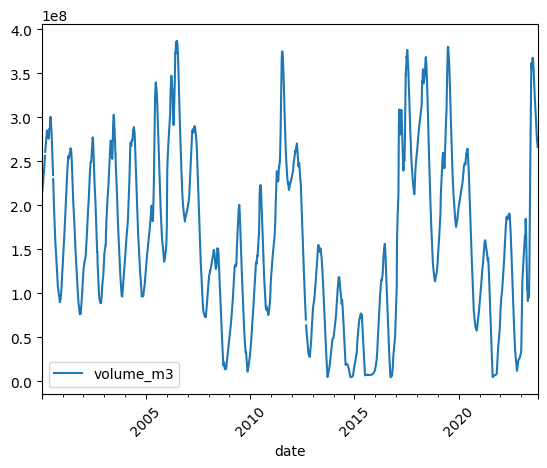

In [6]:
ax = df.loc[df['date'] > '2000-01-01'].plot('date', 'volume_m3')
ax.tick_params(axis='x', rotation=45)